# Testy normalności

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as sm_stats

from scipy import stats

Jednym z podstawowych kryteriów stosowalności technik statystycznych jest **rozkład danych**, do którego konkretna technika zostanie użyta. 

W podstawowych zastosowaniach interesuje nas właściwie jedynie czy rozkład populacji jest normalny, czy nie. Rozkład populacji staramy się ustalić na podstawie zebranej próby, więc w tym celu stosujemy odpowiednie testy statystyczne. 

Najbardziej uniwersalnym i w obecnych czasach najbardziej rozpowszechnionym testem używanym do tego celu jest **test Shapiro-Wilka**.

## Testy normalności - test Shapiro-Wilka
\begin{equation*}
\begin{split}
    H_0&: \text{rozkład badanej cechy jest normalny}\\
    H_1&: \text{rozkład badanej cechy nie jest normalny}
\end{split}
\end{equation*}

Statystyka testowa \textbf{testu Shapiro-Wilka} dana jest wzorem
\begin{equation*}
    T = \frac{\Big( \sum_{i=1}^{[\frac{n}{2}]}a_i(n)(X_{n-i+1:n} - X_{i:n} \Big)^2}{\sum_{i=1}^n(X_i - \overline{X})^2},
\end{equation*}
gdzie $a_i(n)$ są pewnymi stałymi zależnymi od liczności próby, natomiast $[n/2]$ oznacza część całkowitą wyrażenia $n/2$.

Obszar krytyczny ma postać
\begin{equation*}
    W_{\alpha} = (0, w(\alpha, n)],
\end{equation*}
gdzie $w(\alpha, n)$ oznacza kwantyl rzędu $\alpha$ rozkładu statystyki.


## Zadanie 
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) dla rozkładu chi-kwadrat,

c) dla rozkładu wykładniczego,

sporządź histogramy dla wygenerowanych próbek i sprawdź zachowanie się testu Shapiro-Wilka. Przyjmij poziom istotności 0.05.

In [7]:
n = 10
norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
print(stats.shapiro(norm))
chi = stats.chi2.rvs(size=n, df=5)
print(stats.shapiro(chi))
exp = stats.expon.rvs(size=n, scale=1/2)
print(stats.shapiro(exp))
#dla małych próbek est nie działa dobrze, czasem nie odrzuca tam gdzie powinien

ShapiroResult(statistic=0.9329569339752197, pvalue=0.4775991439819336)
ShapiroResult(statistic=0.909939706325531, pvalue=0.28057730197906494)
ShapiroResult(statistic=0.8268047571182251, pvalue=0.0306213591247797)


In [8]:
n = 1000
norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
print(stats.shapiro(norm))
norm2 = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-2, scale=4)
print(stats.shapiro(norm2))
chi = stats.chi2.rvs(size=n, df=5)
print(stats.shapiro(chi))
exp = stats.expon.rvs(size=n, scale=1/2)
print(stats.shapiro(exp))
#tu działa bardzo dobrze

ShapiroResult(statistic=0.9982879161834717, pvalue=0.4245954751968384)
ShapiroResult(statistic=0.981776237487793, pvalue=7.383806344130051e-10)
ShapiroResult(statistic=0.9131103754043579, pvalue=1.7943647875766976e-23)
ShapiroResult(statistic=0.829171895980835, pvalue=2.34466289634506e-31)


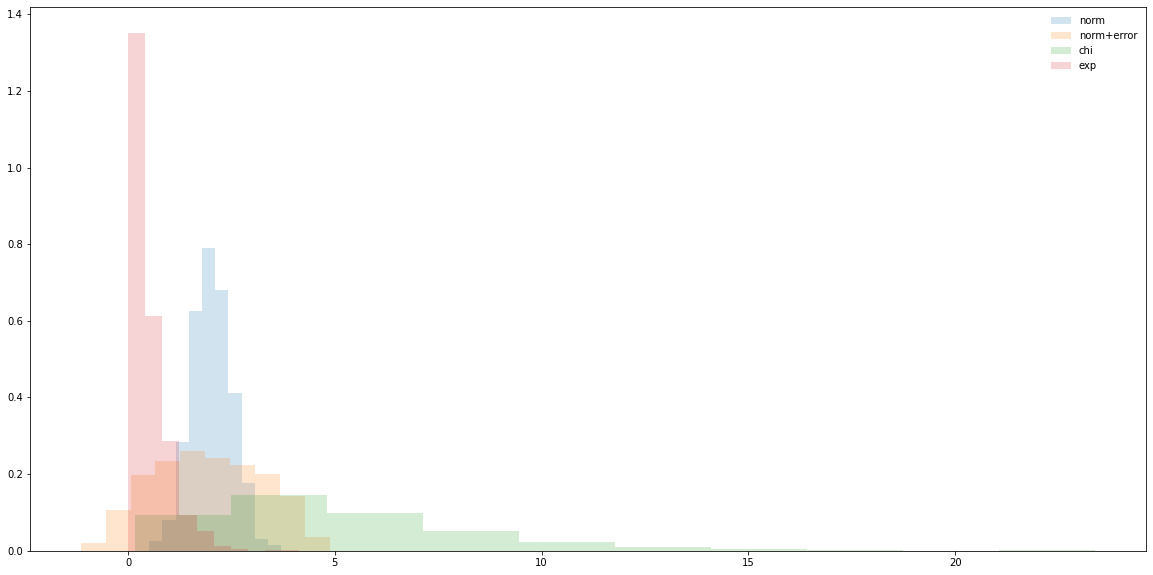

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

plt.hist(norm, histtype='stepfilled', alpha=0.2, density=True, label='norm')
plt.hist(norm2, histtype='stepfilled', alpha=0.2, density=True, label='norm+error')
plt.hist(chi, histtype='stepfilled', alpha=0.2, density=True, label='chi')
plt.hist(exp, histtype='stepfilled', alpha=0.2, density=True, label='exp')
ax.legend(loc='best', frameon=False)
plt.show()

In [12]:
#patrzymy ile razy odrzucamy, gdy nie powinniśmy tego robić (błąd 1 rodzaju)
n =5000
k = 10000
rej = []
for i in range(k):
  norm = stats.norm.rvs(size = n,loc = 2,scale = 0.5)
  rej.append(stats.shapiro(norm)[1]<0.05)
sum(rej)/k
#trzymamy poziom istotności

0.0429

In [13]:
#patrzymy ile razy nieodrzucamy, gdy powinniśmy odrzucić (błąd 2 rodzaju)
n =5000
k = 10000
rej = []
for i in range(k):
  cau = stats.chi2.rvs(size=n, df=5)
  rej.append(stats.shapiro(cau)[1]>0.05)
sum(rej)/k
#to może zależeć od tego jak rozkład który nie jest normalny może być podobny do normalnego 

0.0

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki i sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

In [ ]:
alpha = 0.05

mu = np.linspace(-5, 5, 50)
sigma = np.round(stats.uniform.rvs(size=50, loc=0, scale=2), 2)
nobs = [5, 10, 20, 50, 100, 500, 1000]

for n in nobs:
    reject = 0
    print("---------------------------------")
    for m, s in zip(mu, sigma):
        x = stats.norm.rvs(size=n, loc=m, scale=s)
        pval = stats.shapiro(x)[1]
        print("P-value testu Shapiro-Wilka dla mu={}, sigma={}, n={}: {}".format(m, s, n, pval))
        if pval < alpha: reject += 1
    print("---------------------------------")
    print("Hipoteza o normalności została odrzucona {} razy dla n={}".format(reject, n))

    #dla dużych próbek ok, fałszywie odrzuca mniej niż alpha*n razy

---------------------------------
P-value testu Shapiro-Wilka dla mu=-5.0, sigma=1.08, n=5: 0.2230650931596756
P-value testu Shapiro-Wilka dla mu=-4.795918367346939, sigma=1.18, n=5: 0.9147658348083496
P-value testu Shapiro-Wilka dla mu=-4.591836734693878, sigma=0.22, n=5: 0.8083477020263672
P-value testu Shapiro-Wilka dla mu=-4.387755102040816, sigma=1.9, n=5: 0.19670741260051727
P-value testu Shapiro-Wilka dla mu=-4.183673469387755, sigma=0.73, n=5: 0.18178115785121918
P-value testu Shapiro-Wilka dla mu=-3.979591836734694, sigma=0.61, n=5: 0.49686121940612793
P-value testu Shapiro-Wilka dla mu=-3.7755102040816326, sigma=1.6, n=5: 0.5676903128623962
P-value testu Shapiro-Wilka dla mu=-3.571428571428571, sigma=1.09, n=5: 0.13473592698574066
P-value testu Shapiro-Wilka dla mu=-3.36734693877551, sigma=0.86, n=5: 0.9862073659896851
P-value testu Shapiro-Wilka dla mu=-3.163265306122449, sigma=1.26, n=5: 0.10612426698207855
P-value testu Shapiro-Wilka dla mu=-2.9591836734693877, sigma=1.89,

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki. Przy generowaniu próbki dodaj pewien błąd. Sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

In [ ]:
mu = np.linspace(-5, 5, 50)
sigma = np.round(stats.uniform.rvs(size=50, loc=0, scale=1), 2)
nobs = [5, 10, 20, 50, 100, 500, 5000]

for n in nobs:
    print("---------------------------------")
    reject = 0
    for m, s in zip(mu, sigma):
        x = stats.norm.rvs(size=n, loc=m, scale=s) + stats.uniform.rvs(size=n, loc=-2, scale=4)
        pval = stats.shapiro(x)[1]
        print("P-value testu Shapiro-Wilka dla mu={}, sigma={}, n={}: {}".format(m, s, n, pval))
        if pval < alpha: reject += 1
    print("---------------------------------")
    print("Hipoteza o normalności została odrzucona {} razy dla n={}".format(reject, n))

---------------------------------
P-value testu Shapiro-Wilka dla mu=-5.0, sigma=0.8, n=5: 0.28525441884994507
P-value testu Shapiro-Wilka dla mu=-4.795918367346939, sigma=0.54, n=5: 0.6765522360801697
P-value testu Shapiro-Wilka dla mu=-4.591836734693878, sigma=0.79, n=5: 0.031577445566654205
P-value testu Shapiro-Wilka dla mu=-4.387755102040816, sigma=0.59, n=5: 0.5427475571632385
P-value testu Shapiro-Wilka dla mu=-4.183673469387755, sigma=0.32, n=5: 0.21525505185127258
P-value testu Shapiro-Wilka dla mu=-3.979591836734694, sigma=0.13, n=5: 0.47387057542800903
P-value testu Shapiro-Wilka dla mu=-3.7755102040816326, sigma=0.02, n=5: 0.012519503943622112
P-value testu Shapiro-Wilka dla mu=-3.571428571428571, sigma=0.6, n=5: 0.9736552238464355
P-value testu Shapiro-Wilka dla mu=-3.36734693877551, sigma=0.89, n=5: 0.5750726461410522
P-value testu Shapiro-Wilka dla mu=-3.163265306122449, sigma=0.45, n=5: 0.13398802280426025
P-value testu Shapiro-Wilka dla mu=-2.9591836734693877, sigma=0.

**Wniosek:**
- dla małych próbek nawet duże odstępstwa od rozkładu normalnego nie są wykrywane przez test Shapiro-Wilka.
- dla dużych próbek test odrzuca hipotezę zerową nawet przy małych odstępstwach od rozkładu normalnego (wówczas lepiej opierać się na metodach graficznych).

## Metody graficzne

- histogram (z naniesionym fitem rozkładu normalnego)

- $qq$-plot:
    * oś x - teoretyczne kwantyle z rozkładu normalnego
    * oś y - empiryczne kwantyle wyznaczone na podstawie próby; punkty na wykresie powinny układać wzdłuż prostej $y=x$.

In [ ]:
stats.norm.fit

<bound method _call_super_mom.<locals>.wrapper of <scipy.stats._continuous_distns.norm_gen object at 0x7fb85651bd10>>

In [ ]:
n = 100

norm2 = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-2, scale=4)
norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)

## Zadanie
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) rozkładu chi-kwadrat,

c) rozkładu wykładniczego,

sporządź histogramy z naniesionym filtrem rozkładu normalnego oraz wykresy $qq$-plot. Na podstawie otrzymanych rysunków oceń czy rozkład jest normalny.

In [ ]:
n = 10000
norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
norm_error = norm + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2)
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)

In [ ]:
?stats.norm.fit

1.9995232474272244 0.4977593631245727
1.9985279580702626 0.6068885893765565
5.0075451925385615 3.2117344672930837
0.499315386964577 0.49661889111312313


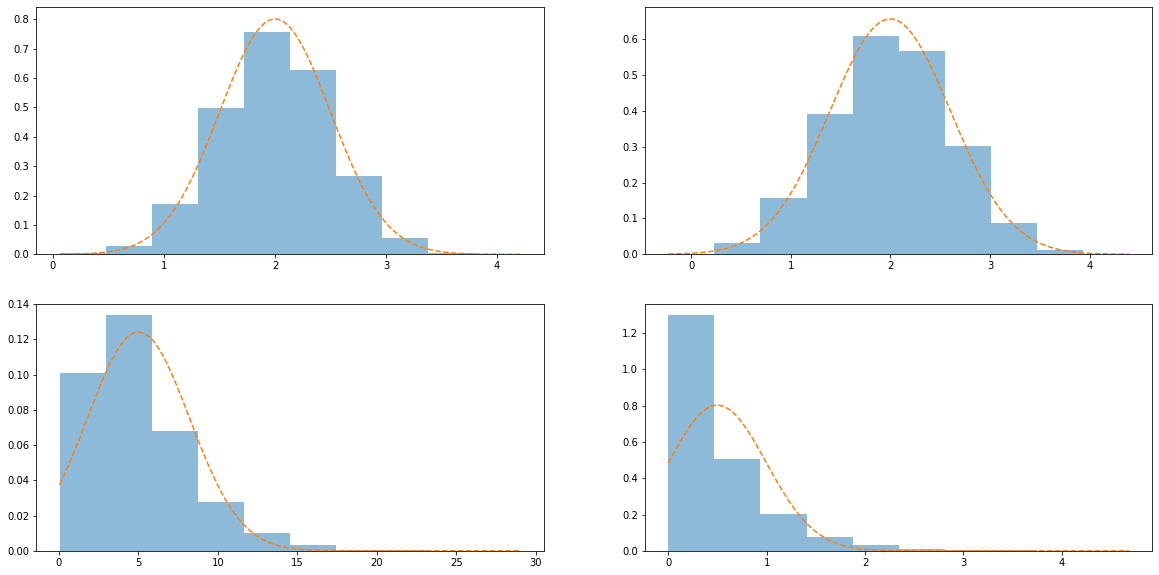

In [ ]:
# histogram z naniesionym filtrem rozkładu normalnego
m1, s1 = stats.norm.fit(norm)
print(m1, s1)
m2, s2 = stats.norm.fit(norm_error)
print(m2, s2)
m3, s3 = stats.norm.fit(chi)
print(m3, s3)
m4, s4 = stats.norm.fit(exp)
print(m4, s4)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
N_bins = 10

x_range = np.linspace(norm.min(), norm.max(), 100)
ax[0, 0].hist(norm, bins=N_bins, density=True, alpha=0.5)
ax[0, 0].plot(x_range, stats.norm.pdf(x_range, m1, s1), '--')

x_range = np.linspace(norm_error.min(), norm_error.max(), 100)
ax[0, 1].hist(norm_error, bins=N_bins, density=True, alpha=0.5)
ax[0, 1].plot(x_range, stats.norm.pdf(x_range, m2, s2), '--')

x_range = np.linspace(chi.min(), chi.max(), 100)
ax[1, 0].hist(chi, bins=N_bins, density=True, alpha=0.5)
ax[1, 0].plot(x_range, stats.norm.pdf(x_range, m3, s3), '--')

x_range = np.linspace(exp.min(), exp.max(), 100)
ax[1, 1].hist(exp, bins=N_bins, density=True, alpha=0.5)
ax[1, 1].plot(x_range, stats.norm.pdf(x_range, m4, s4), '--')

In [ ]:
?sm.qqplot

ShapiroResult(statistic=0.9998859167098999, pvalue=0.9349678158760071)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


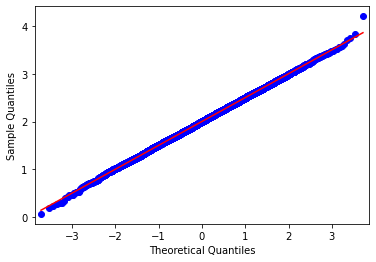

In [ ]:
sm.qqplot(norm, stats.norm, line='q')
print(stats.shapiro(norm))
plt.show()

ShapiroResult(statistic=0.9996418356895447, pvalue=0.06075047329068184)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


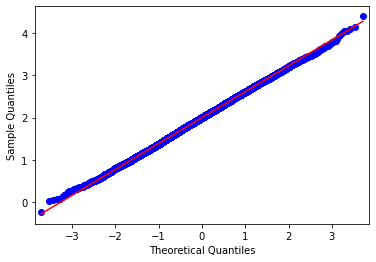

In [ ]:
sm.qqplot(norm_error, stats.norm, line='q')
print(stats.shapiro(norm_error))
plt.show()

ShapiroResult(statistic=0.9134407043457031, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


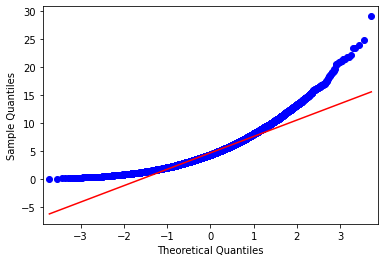

In [ ]:
sm.qqplot(chi, stats.norm, line='q')
print(stats.shapiro(chi))
plt.show()

ShapiroResult(statistic=0.8191227912902832, pvalue=0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


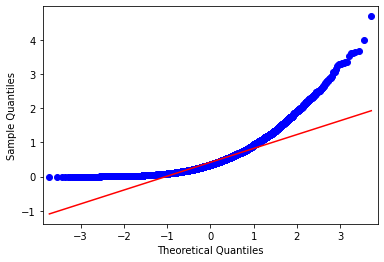

In [ ]:
sm.qqplot(exp, stats.norm, line='q')
print(stats.shapiro(exp))
plt.show()

## Inne testy do badania normalności

* testy oparte na kurtozie i skośności:
    - [test D'Agostino $K^2$](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test): `scipy.stats.normaltest`;

    - [test Jarque–Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test): `scipy.stats.jarque_bera`;
    
* testy oparte na dystrybuancie empirycznej:
    - [test Kolmogorova–Smirnova](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test): `scipy.stats.kstest`;
    
    - [test Lilliefors](https://en.wikipedia.org/wiki/Lilliefors_test): `statsmodels.stats.diagnostic.lilliefors`;

## Test typu omnibus D’Agostino-Pearsona oparty o kurtozę i skośność
Łącząc dwa testy otrzymuje się test czuły na odstępstwa od normalności zarówno w postaci niezerowej skośności jak i kurtozy istotnie różniej od 3.

Statystyką testową jest
$$
K^2=(Z(\sqrt{b_1}))^2+ (Z(b_2))^2,
$$
gdzie $Z(\sqrt{b_1})$ to  statystyka  testowa  testu  opartego  o  skośność  a $Z(b_2)$  to  statystyka  testowa  testu opartego o kurtozę.

Asymptotyczny rozkład tej statystyki to rozkład $\chi^2$.

Ponadto:
$m_k = \frac{1}{n}\sum_{i=1}^n (x_i -\overline{x})^k$, $\sqrt{b_1} = \frac{m_3}{m_2^{3/2}}$, $b_2 = \frac{m4}{m_2^2}-3$.

## Test typu omnibus Jarque-Bera oparty o kurtozę i skośność
Innym testem opartym o kurtozę i skośność jest test Jarque-Bera. Statystyka testowaw przypadku tego testu ma łatwiejszą postać niż dla testu D’Agostino-Pearsona. Traci się jednak na niedokładnym oszacowaniu wartości krytycznych przy niewielkich wielkościach próby. Asymptotycznie ten test jest tak samo mocny jak test D’Agostino-Pearsona, ale na asymptotykę można liczyć jedynie w przypadku dużych prób.

Statystyka testowa ma postać:
$$
    \text{JB} = \frac{n}{6}\Big((\sqrt{b_1})^2 + \frac{1}{4}(b_2-3)^2\Big).
$$


## Test Kołmogorova-Smirnova

Test oparty o odległość supremum pomiędzy dystrybuantami empiryczną $F_n$ i teoretyczną $F$
$$
d(F_n, F) = \sup_{x}|F_n(x) - F(x)|.
$$

Statystka testowa oparta o powyższą odległość sprowadza się do liczenia maksimum modułu różnicy dystrybuant w punktach skoku dystrybuanty empirycznej:
$$
D = \max_{x_i}|F_n(x_i) - F(x_i)|.
$$

Rozkład statystyki testowej można wyznaczyć w sposób dokładny dla prostej hipotezy zerowej, a więc dla porównania z jednym określonym rozkładem. Asymptotycznie, ta statystyka przemnożona przez $\sqrt{n}$ ma rozkład Kołmogorowa.

Test ten pomimo łatwego opisu probabilistycznego nie jest stosowany z uwagi na moc niższą niż konkurencja.

## Test Lillieforsa

Ten test to modyfikacja testu Kołmogorowa-Smirnowa zaproponowana przez Huberta Lillieforsa, pozwalająca na testowanie zgodności z całą rodziną rozkładów normalnych, bez znajomości parametrów średniej i odchylenia standardowego (test Kołmogorowa-Smirnowa pozwala na zbadanie zgodnościz jednym określonym rozkładem).

Statystyka testowa w przypadku testu Lillieforsa wygląda tak samo jak w przypadku testu Kołmogorowa-Smirnowa. Różnica polega na zastosowaniu innego rozkładu dla statystyki testowej (przybliżenie rozkładu dokładnego), uwzględniającego to, że hipoteza zerowa jest hipotezą złożoną.

In [ ]:
?stats.kstest

In [ ]:
?stats.normaltest

In [ ]:
stats.normaltest(norm_error)

NormaltestResult(statistic=8.674340501855454, pvalue=0.01307347055116292)

In [ ]:
?stats.jarque_bera

In [ ]:
stats.jarque_bera(norm_error)

Jarque_beraResult(statistic=7.754053300603224, pvalue=0.020712318682074127)

In [ ]:
?stats.kstest

In [ ]:
norm_error_stand = (norm_error - np.mean(norm_error)) / np.std(norm_error, ddof=1)
stats.kstest(norm_error_stand, 'norm')

KstestResult(statistic=0.008188890312417957, pvalue=0.5110983957648201)

In [ ]:
?sm_stats.diagnostic.lilliefors

In [ ]:
sm_stats.diagnostic.lilliefors(norm_error, 'norm')

(0.008188890312417957, 0.0979598934100445)

## Zadanie
Napisz funkcję, która dla dowolnej próbki zwróci ramkę danych z wyznaczonymi statystykami testowymi i $p$-wartościami dla poznanych testów normalności.

In [ ]:
def normal_tests(x):
    pass

In [ ]:
def normal_tests(x):
    tests = ['Shapiro-Wilk Test', "Omnibus Test", "Jarque–Bera Test", 
             "Kolmogorov–Smirnov Test", "Lilliefors Test"]
    shapiro = stats.shapiro(x)
    omnibus = stats.normaltest(x)
    jarque_bera = stats.jarque_bera(x)
    x_stand = (x - np.mean(x)) / np.std(x, ddof=1)
    ks = stats.kstest(x_stand, 'norm')
    lilliefors = sm_stats.diagnostic.lilliefors(x, 'norm')
    
    statistics = np.round([shapiro[0], omnibus.statistic, jarque_bera[0], ks.statistic, lilliefors[0]], 2)
    pvalues = np.round([shapiro[1], omnibus.pvalue, jarque_bera[1], ks.pvalue, lilliefors[1]], 5)
    
    return pd.DataFrame({
        'test': tests,
        'statistic': statistics,
        'pvalue': pvalues
    })

In [ ]:
normal_tests(norm_error)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,test,statistic,pvalue
0,Shapiro-Wilk Test,1.00,0.06075
1,Omnibus Test,8.67,0.01307
2,Jarque–Bera Test,7.75,0.02071
3,Kolmogorov–Smirnov Test,0.01,0.51110
4,Lilliefors Test,0.01,0.09796


## Zadanie
Wczytaj dane `mtcars.csv` i sprawdź normalność każdej z kolumn (za pomocą testów statystycznych oraz metod graficznych). 

In [ ]:
mtcars = pd.read_csv("mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
for col in mtcars.iteritems():
    print("Testy normalności dla zmiennej: {}".format(col[0]))
    print(normal_tests(col[1]))

Testy normalności dla zmiennej: mpg
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.95  0.12288
1             Omnibus Test       2.71  0.25741
2         Jarque–Bera Test       2.24  0.32609
3  Kolmogorov–Smirnov Test       0.13  0.64125
4          Lilliefors Test       0.13  0.22294
Testy normalności dla zmiennej: cyl
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.75  0.00001
1             Omnibus Test      38.53  0.00000
2         Jarque–Bera Test       3.95  0.13901
3  Kolmogorov–Smirnov Test       0.28  0.00945
4          Lilliefors Test       0.28  0.00100
Testy normalności dla zmiennej: disp
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.92  0.02081
1             Omnibus Test       5.00  0.08207
2         Jarque–Bera Test       2.44  0.29557
3  Kolmogorov–Smirnov Test       0.19  0.15434
4          Lilliefors Test       0.19  0.00362
Testy normalności dla zmiennej: hp
          